We start by importing the Necessary libraries for the assignment.

In [15]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit, fsolve
import scipy.constants as const


darkmatter_data = [] #array to store data from csv file

with open("darkmatter.csv") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader: # each row is a list
        darkmatter_data.append(row)

darkmatter_data.pop(0)#removing the string headings

# For reference, columns are RA(degrees),Dec(degrees),Propermotion(mas/year),redshift 

KriGal = [140.76398, 75.5344] #coordinates for KriGal

relative_coordinates = np.array(darkmatter_data)[:,[0,1]].astype(float)#extracting RA and Dec columns

relative_coordinates = (relative_coordinates - KriGal)*((math.pi)/ 180)# converting data into relative coordinates and SI Units


Formula for calculating relative velocities :
$$ z = \sqrt{\frac{c + v}{c - v}} - 1 $$

Rearranging we get,

$$ v = c \frac{(z + 1)^2 - 1}{(z + 1)^2 + 1}$$

For Recession Velocity Relative to Galaxy Centre, we subtract Recession Velocity of KriGal.

To Calculate Recession Velocity of KriGal we use Hubble Law, which is stated as:

$$ v = H_0 D$$ 

where $H_0$ is Hubble's Constant, whose value is 70 (Km/s)/parsec


LinregressResult(slope=3.3368389054988096e-09, intercept=0.0008176094654915062, rvalue=0.9999999573142099, pvalue=0.0, stderr=3.253521989683358e-14, intercept_stderr=6.7416751056999005e-09)


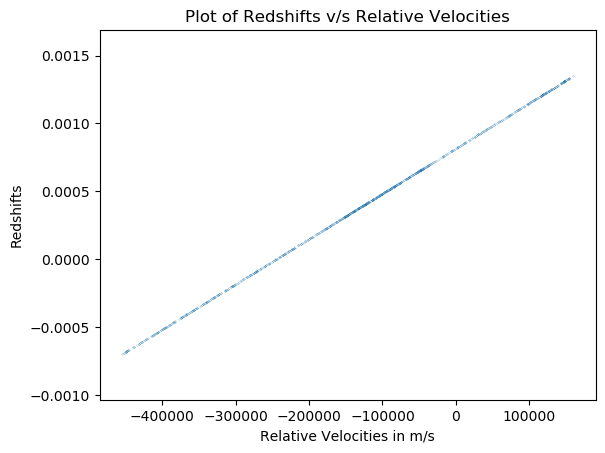

In [16]:
redshifts = np.array(darkmatter_data)[:,[3]].astype(float)#extracting RedShifts

Krigal_recession_vel = 70*(3.5)*1000 #radial velocity of Krigal

zprime = np.array([])

zprime = (redshifts + 1)**2 # array to store values corresponding to (z+1)**2 in the given formula

relative_vel = np.array([])# Relative Recession Velocity i.e Recession velocity of star - Recession velocity of KriGal

relative_vel = ((const.c)*(zprime - 1))/(zprime + 1) - Krigal_recession_vel  # Calculation of relative radial velocities

# We Plot redshifts vs Velocity curve, for v << c, we know z = v/c, therefore slope aprroximately comes out to be 1/c.
plt.scatter(relative_vel, redshifts, marker = '.', s = 0.1)

plt.xlabel("Relative Velocities in m/s")
plt.ylabel("Redshifts")
plt.title("Plot of Redshifts v/s Relative Velocities")
slope = scipy.stats.linregress(relative_vel[:,0],redshifts[:,0])

print(slope)

Tangential Velocity of a star, given its proper motion $\mu$ and Radial Distance $d$  (from Earth) can be calculated as:

$$ v_t = 4.74 \mu d $$


In [17]:
proper_motion = np.array(darkmatter_data)[:,[2]].astype(float) # Extracting proper motion in datatype float


tangential_vel = (4.74)*(proper_motion)*3500*1000 #Calculating tangential velocities in SI Units

#print(tangential _vel) Test Statement

Angular Separation between $\gamma$ between two points on a sphere, given their RA and Declination can be calcuated as 

$$cos \gamma = sin \delta _1 sin \delta _2 + cos \delta _1 cos \delta _2 cos ( \alpha _1 - \alpha _2) $$

where, $\delta _1 , \delta _2$ are declination of the two points, and $\alpha _1, \alpha _2$ are RA of the two points

In [18]:
#Calculating angular separation
angle_sep = np.array([])#Initialization
RA_data = np.array(darkmatter_data)[:,[0]].astype(float) 
Dec_data = np.array(darkmatter_data)[:,[1]].astype(float)

# Convert Extracted data into SI Units
RA_data = RA_data *((math.pi)/ 180)
Dec_data = Dec_data*((math.pi)/ 180)
KriGal[0] = 140.76398*((math.pi)/ 180)
KriGal[1] = 75.5344*((math.pi)/ 180)

#Calculation Step, We use the formula for anguar separation 
angle_sep = np.arccos(np.sin(Dec_data)*np.sin(KriGal[1]) + np.cos(Dec_data)*np.cos(KriGal[1])*np.cos(RA_data - KriGal[0]))

# print(angle_sep) Test Statement

Given the magnitude of angular separations we get are small, we can calculate tangential separation simply as

$$ d_t = \gamma d $$

where, $\gamma$ is angular separation, $d$ is distance of the star from Earth, which can be taken as distance of KriGal from Earth and distance of star from galaxy centre will be very small as compared to distance of galaxy centre from Earth

In [19]:
tangential_dist = np.array([])
tangential_dist = 3500*1000*3.26156*(angle_sep) #tang distance in light years

# print(tangential_dist)

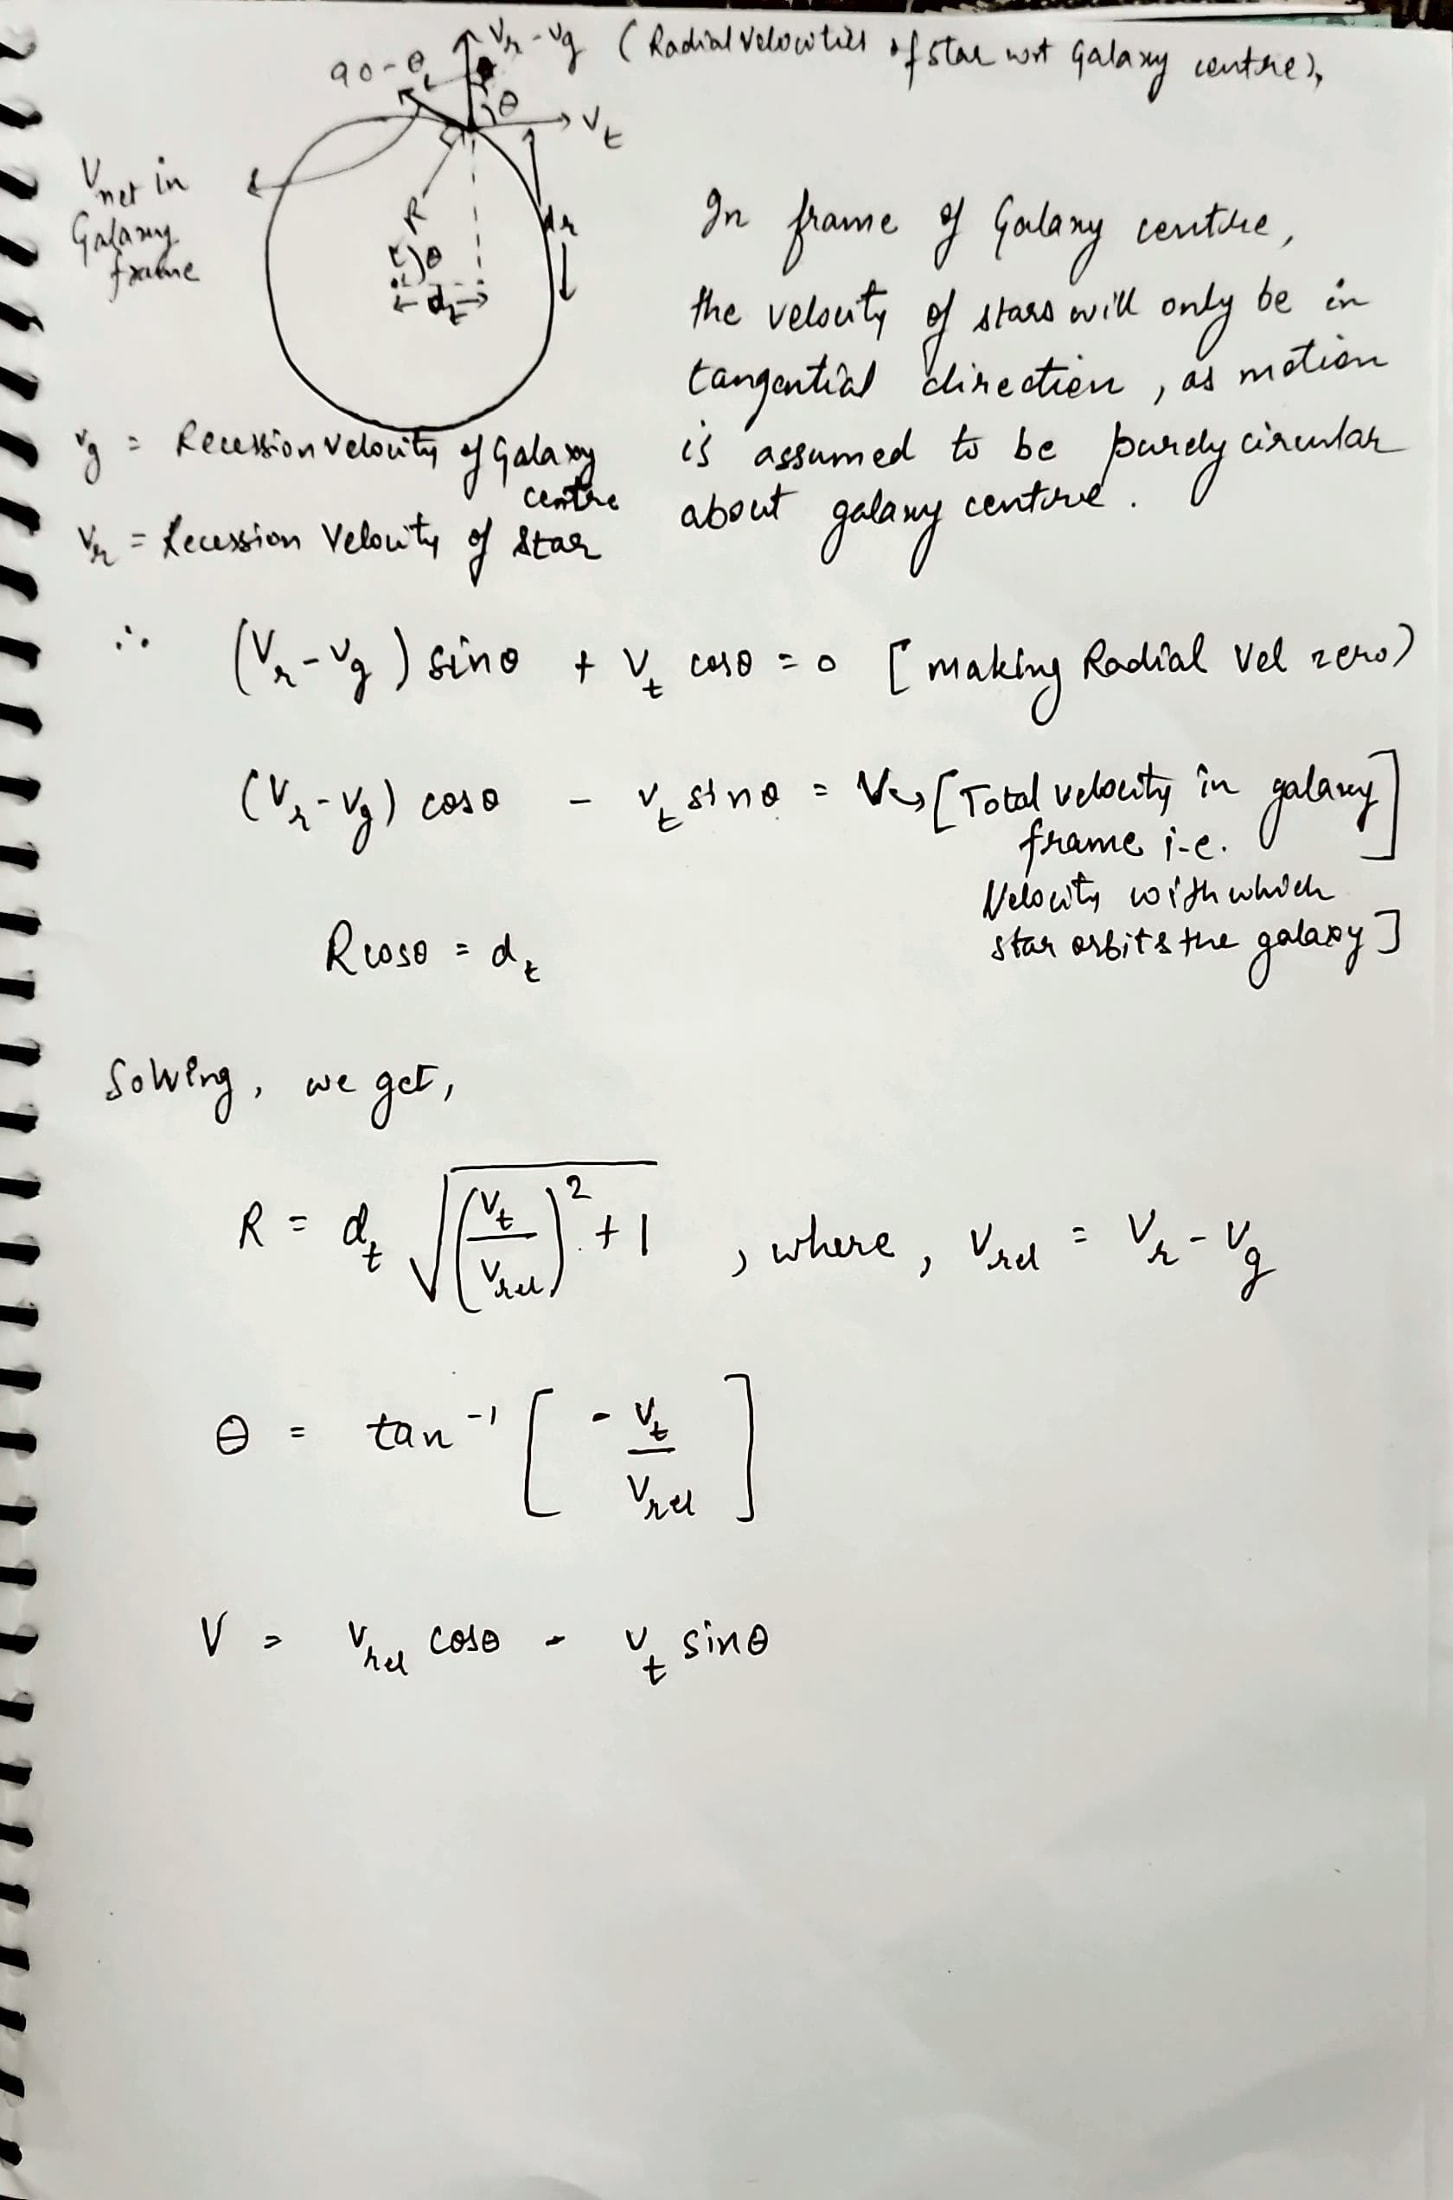

Text(0.5, 1.0, 'Scatter Plot of Stars in KriGal')

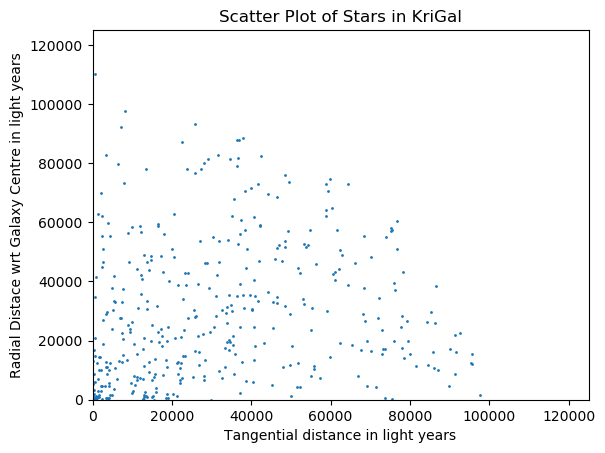

In [20]:
total_dist = tangential_dist*np.sqrt(((tangential_vel)/(relative_vel))**2 + 1)
#Plotting x and y components of Total Distance to get an "image" of the galaxy
plt.scatter(tangential_dist, np.sqrt((total_dist)**(2) - (tangential_dist)**2), s = 1)
plt.xlim(0,125000)
plt.ylim(0,125000)
plt.xlabel("Tangential distance in light years")
plt.ylabel("Radial Distace wrt Galaxy Centre in light years")
plt.title("Scatter Plot of Stars in KriGal")

In [21]:
total_vel = np.array([])#Initialization
theta = np.arctan(-tangential_vel/relative_vel)
total_vel = (relative_vel*np.cos(theta)) - (tangential_vel)*np.sin(theta)


score=  -0.8883353261606122


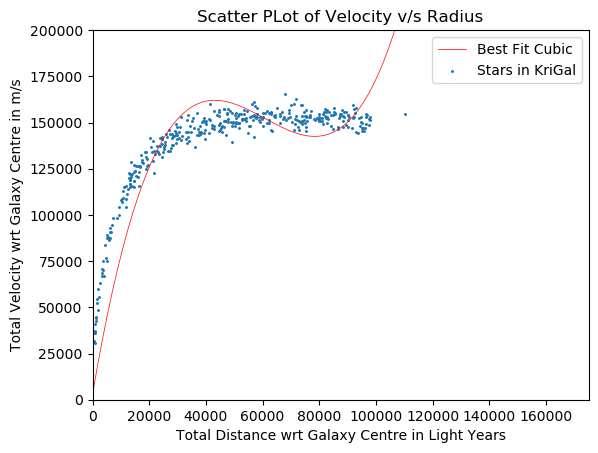

In [22]:
#Plotting Velocity v/s Radius
plt.scatter(total_dist,abs(total_vel),marker = '.', s = 5, label="Stars in KriGal")
plt.title("Scatter PLot of Velocity v/s Radius")
plt.xlabel("Total Distance wrt Galaxy Centre in Light Years")
plt.ylabel("Total Velocity wrt Galaxy Centre in m/s")

Krigal_dist = np.zeros(len(total_dist))
Krigal_vel = np.zeros(len(total_dist))

j = 0
#Filtering Values to get stars inside KriGal
for i in range(0,len(total_dist)):
    if total_dist[i] < 175000 :
        Krigal_dist[j] = total_dist[i]
        Krigal_vel[j] = total_vel[i]
        j+=1  
degree = 3
#Plotting Best Fit Cubic 
poly_fit = np.poly1d(np.polyfit(Krigal_dist,abs(Krigal_vel), degree))
yy = np.linspace(0,175000,100)
plt.plot(yy, poly_fit(yy), c='red', linewidth=0.5, label='Best Fit Cubic')
print("score= ", r2_score(Krigal_vel, poly_fit(Krigal_dist)))
plt.xlim(0,175000)
plt.ylim(0,200000)
plt.legend()

By NFW Profile, 

$$ \rho (r) = \frac{\rho _0}{\frac{r}{R_s}(1 + \frac{r}{R_s})^2}$$

We can write mass element as :

$$ dm = 4 \pi r^2 \rho (r) dr = 4 \pi \rho _0 \frac{R_s ^3 r}{(R_s + r)^2} dr $$

$$ \int_{0}^{M_r} dm = \int_{0}^{r} 4 \pi r^2 \rho (r) dr = 4 \pi \rho _0 \frac{R_s ^3 r}{(R_s + r)^2} dr = \int_{0}^{r} 4 \pi \rho _0 R_s ^3 (\frac{1}{R_s + r} - \frac{R_s}{(R_s + r)^2}) dr $$

We get expression for Mass in a radius $r$ as :

$$ M_r = 4 \pi \rho _0 R_s ^3 [ ln (\frac{R_s + r}{R_s}) - \frac{r}{R_s + r}]$$

We also know,

$$\frac{v^2}{r} = \frac{GM}{r^2}$$

Combining this with expresseion for $M_r$, We get :

$$ v = \sqrt{ \frac{4 \pi \rho _0 R_s ^3}{r} [ln (\frac{R_s + r}{R_s}) - \frac{r}{R_s + r}]} $$

Now, For We can get expression for Mean Density by dividing Mass in a volume of radius $r$ by total volume

$$ < \rho > = \frac{M_r}{\frac{4}{3} \pi r^3} = \frac{3 \rho _0 R_s ^3}{r^3} [ln (\frac{R_s + r}{R_s}) - \frac{r}{R_s + r}] $$

[3.09062955e+20] [[2.16593112e+35]]
[32667.98013973]


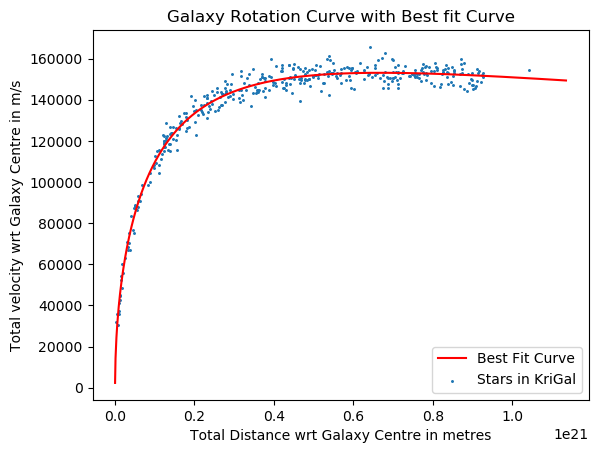

In [23]:
#Converting 2D arrays to flattened 1D Arrays
total_dist = total_dist.flatten()
total_vel = total_vel.flatten()

# Initializing values of required constants
G = const.G
Pi = const.pi
Ms = 1.98847*(10**30)
pc = 30856775814913673 #Parsec in SI
Po = (0.02*Ms)/(pc**3)

filter_x = []
filter_y = []

#Removing zeroes from Earlier Filtered Arrays
for arr in Krigal_dist:
    if abs(arr) > 0 :
        filter_x.append(arr)
for arr in Krigal_vel:
    if abs(arr) > 0 :
        filter_y.append(arr)
        
filter_x = np.array(filter_x) #Filtered Array
filter_y = np.array(filter_y) #Filtered Array
# print(filter_y)

#Derived Velocity Function
def func(R,Rs):
    vel = (np.sqrt((4*np.pi*Po*G*(Rs**3)*(np.log(1 + R/Rs) - R/(R + Rs)))/R))
    return vel
    
#Finding optimised parameter and covariance
param, param_cov = curve_fit(func, filter_x*const.light_year, abs(filter_y),100000*const.light_year)

print(param, param_cov)

# Plotting the Best Fit Curve 
plt.title("Galaxy Rotation Curve with Best fit Curve")
plt.scatter(filter_x*const.light_year,abs(filter_y),marker = '.', s = 5, label="Stars in KriGal")
plt.xlabel("Total Distance wrt Galaxy Centre in metres")
plt.ylabel("Total velocity wrt Galaxy Centre in m/s")


x = np.linspace(pc,120000*const.light_year,1000)

print(param/const.light_year)#Converting values to Light Years

plt.plot(x,func(x,param),color='red', label='Best Fit Curve')

plt.legend()


Best Fit Value for $R_s$ is $3.09062955 \times 10^{20}$ metres or $32667.98013973$ Light Years

Covariance : $2.16593112 \times 10^{35}$

In [24]:
#Mean Density Function
def density_func(R):
    return ((3*Po*(param**3)*(np.log(1 + R/param) - R/(R + param)))/(R**3))

print(density_func(50*param)) # Density at 50*Rs   

[9.58830066e-26]


Mean Density at $50 R_s$ is $9.58830066 \times 10^{-26}$ SI Units

In [25]:
def virial_func(R):
    return ((3*Po*(param**3)*(np.log(1 + R/param) - R/(R + param)))/(R**3)) - 50*8.5*(10**(-27))

virial_radius = fsolve(virial_func, 28.5*param)
print(virial_radius)
print(virial_radius/param)# In multiples of Rs
virial_radius = 30*param #Rounding of to nearest multiple of 10 Rs

[8.80211463e+21]
[28.48000538]


Value of Virial Radius is $8.80211463 \times 10^{21}$ metres, which is $28.48000538 R_s$

Rounding of to nearest multiple of 10 $R_s$ , 

Value of Virial radius is 30 $R_s$

In [26]:
#Mass of dark Matter in terms of Solar Masses
print((4*(np.pi)*Po*(param**3)*(np.log(1 + virial_radius/param) - virial_radius/(virial_radius + param)))/Ms)

[6.22824012e+11]


The mass of the Dark Matter in KriGal is $6.22824012 \times 10^{11}$ solar masses